<a href="https://colab.research.google.com/github/gkrdls/data-analysis-programming/blob/main/8%EC%9E%A5_%ED%9B%84%EB%B0%98%EB%B6%80_(%EA%B3%A0%EA%B8%89_%EC%8B%9C%EA%B0%81%ED%99%94_%EC%8B%9C%EB%B3%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. 고급시각화

#### 배경설정

In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

#한글타이틀
plt.rc('font', family='Malgun Gothic')

#데이터 준비
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")   # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
lights = sns.load_dataset("flights")    # 여객운송 데이터

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0.5, 0, '요일')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54017 (\N{HANGUL SYLLABLE TIB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args,

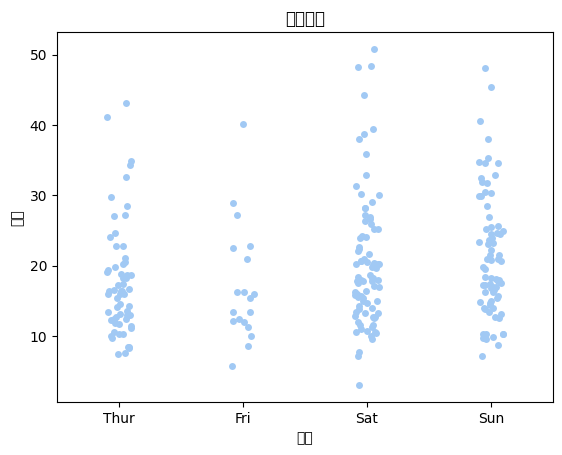

In [12]:
#데이터 준비
tips = sns.load_dataset("tips")    # 팁 데이터

#기본 배경 설정 (deep, muted, pastel, bright, dark, colorblind)
sns.set_palette("pastel")
#sns.set_palette("deep")

#시각화
# --> day별 total_bill을 stripplot으로 시각화하는 문장 작성
sns.stripplot(x="day", y="total_bill", data=tips)
# 개인화
plt.title('팁데이터')
plt.ylabel("요금")
plt.xlabel("요일")

#### 막대그래프

<Axes: xlabel='sex', ylabel='tip'>

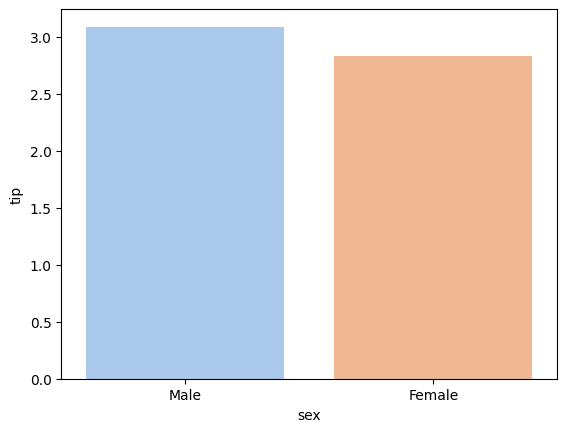

In [4]:
#평균치 빠르게 집계해서 시각화하기
# --> sex별 tip을 막대그래프로 시각화하는 문장 작성
tip_by_sex = tips.groupby("sex")["tip"].mean().reset_index()

sns.barplot(x="sex", y="tip", data=tip_by_sex)

<Axes: xlabel='sex', ylabel='tip'>

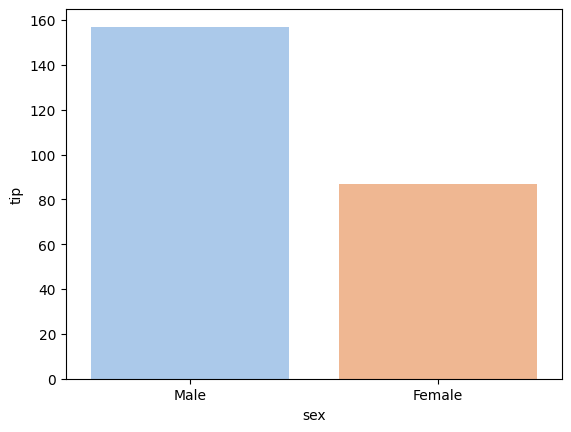

In [5]:

# estimator를 지정하면 된다. (여기에 들어올 값으로는 list에 해당하는 함수를 사용할 수 있다.)
# --> sex별 tip을 막대그래프를 계산할 집계값(estimator)를 범주형 변수의 갯수(len)로 시각화하는 문장 작성
sns.barplot(x="sex", y="tip", data=tips, estimator=len)

<Axes: xlabel='sex', ylabel='tip'>

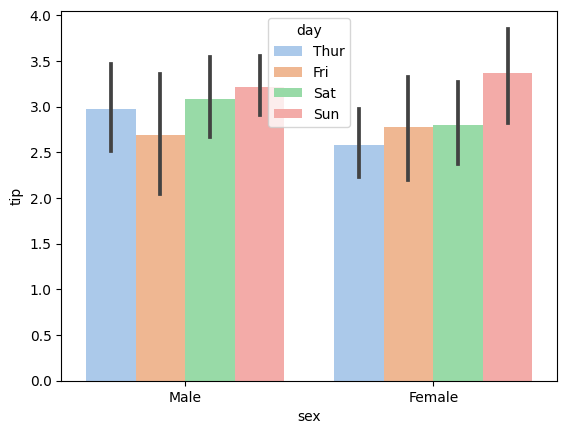

In [7]:
#여러 열에서 집단 묶어서 세부 집단 시각화 하기
# hue 파라미터 추가
# --> sex별 tip을 막대그래프에 hue 옵션 추가하여 시각화하는 문장 작성
sns.barplot(x="sex", y="tip", data=tips, hue="day")

<ipython-input-9-3547be04ea48>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="sex", y="tip", data=tips,hue="day", ci="sd")


<Axes: xlabel='sex', ylabel='tip'>

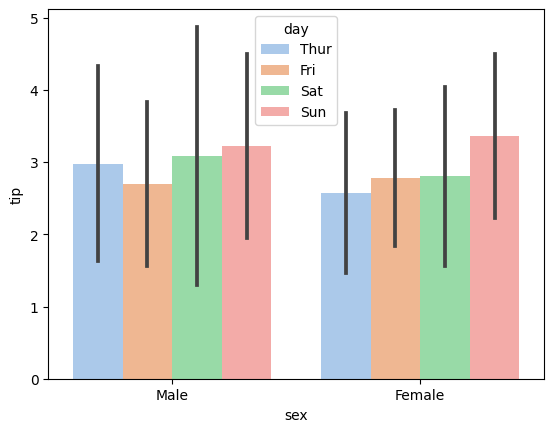

In [9]:
# 표준편차 오차막대
# --> sex별 tip을 막대그래프에 오차막대 옵션(ci)을 표준편차(sd)로 하여 시각화하는 문장 작성
sns.barplot(x="sex", y="tip", data=tips,hue="day", ci="sd")

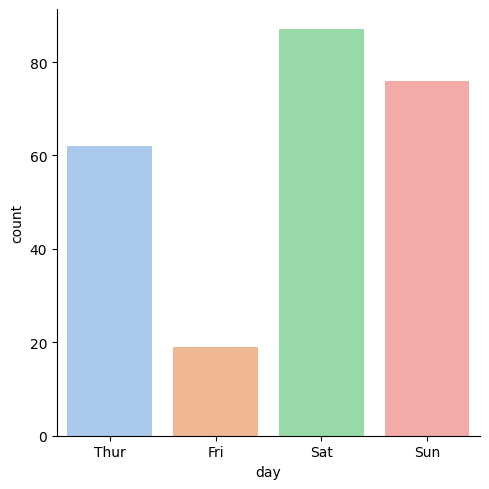

In [10]:
# 요일별 팁 카운트
# --> day별 데이터의 발생 빈도(count)를 catplot으로 시각화하는 문장 작성
sns.catplot(x="day", data=tips, kind="count", palette="pastel")

#### 박스플롯

<Axes: xlabel='sex', ylabel='tip'>

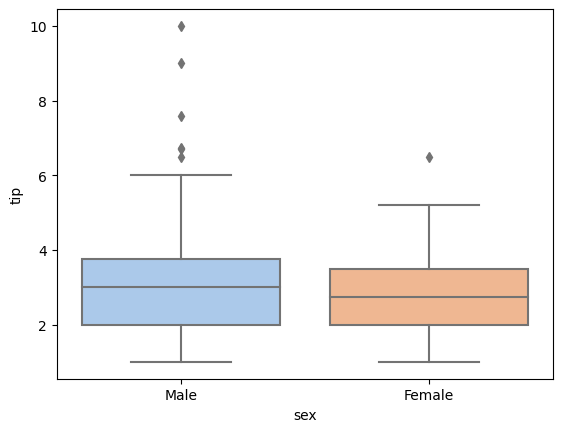

In [13]:
# --> sex별 tip 데이터를 박스플롯으로 시각화하는 문장 작성
sns.boxplot(x="sex", y="tip", data=tips)

<Axes: >

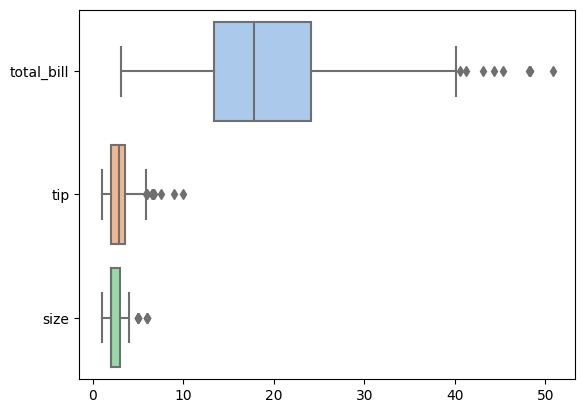

In [14]:
# --> tips 데이터 프레임의 데이터를 수평으로 박스플롯으로 시각화하는 문장 작성
sns.boxplot(data=tips, orient="h")

### 박스플롯으로 이상치 제거 시각화

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

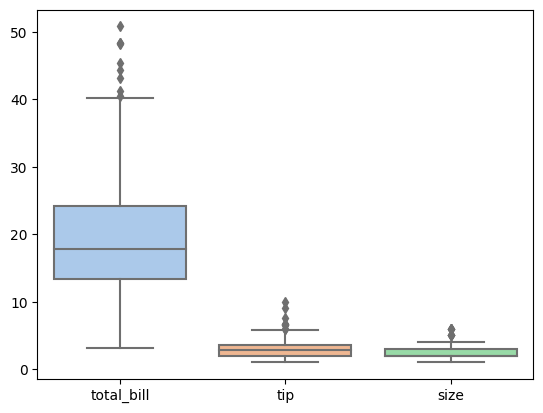

In [16]:
sns.boxplot(data=tips)

In [17]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [18]:
(tips['total_bill'] < 40) & (tips["tip"] < 8)

0      True
1      True
2      True
3      True
4      True
       ... 
239    True
240    True
241    True
242    True
243    True
Length: 244, dtype: bool

In [19]:
newtips=tips[(tips['total_bill'] < 40) & (tips["tip"] < 8)]
newtips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

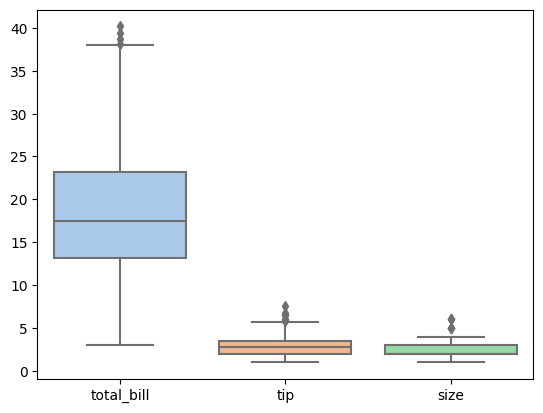

In [22]:
# --> tips에서 이상치(outlier)를 제거한 newtips 데이터 프레임의 데이터를 박스플롯으로 시각화하는 문장 작성
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 이상치 제거 후 새로운 데이터 프레임 생성
newtips = remove_outliers(tips, "total_bill")

# 시각화
sns.boxplot(data=newtips)

### 4. 변수 유형별 시각화

#### 일변수

#### 연속형

<Axes: xlabel='tip'>

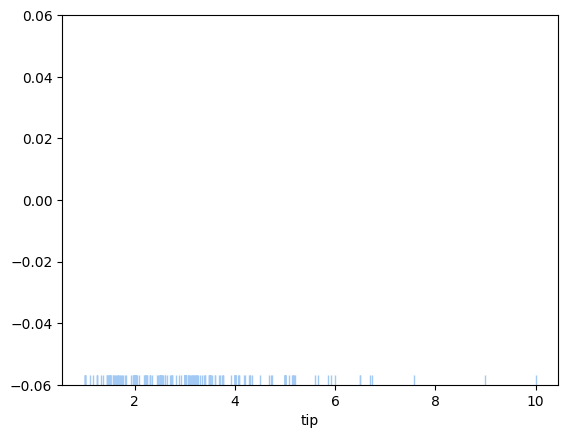

In [23]:
#sns.rugplot(데이터프레임.변수)

# --> tip 데이터를 선분 그래프(rugplot)으로 시각화하는 문장 작성
sns.rugplot(tips["tip"])

<Axes: xlabel='tip', ylabel='Density'>

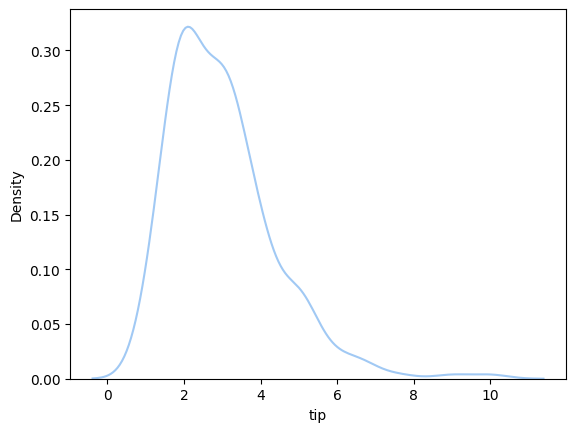

In [24]:
#커널밀도함수
#sns.kdeplot(데이터프레임.변수)
# --> tips 데이터 프레임에 있는 tip 데이터의 분포를 시각화(kdeplot)하는 문장 작성
sns.kdeplot(tips["tip"])

<ipython-input-25-66caac3d9a01>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips["tip"])


<Axes: xlabel='tip', ylabel='Density'>

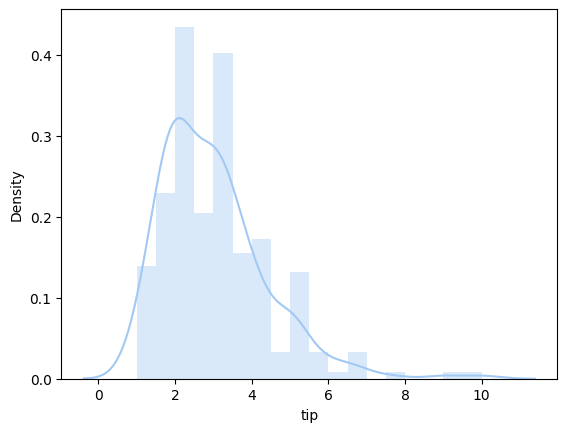

In [25]:
#sns.distplot(데이터프레임.변수)
# --> tips 데이터 프레임에 있는 tip 데이터의 분포와 히스토그램을 시각화(distplot)하는 문장 작성
sns.distplot(tips["tip"])

#### 범주형

<Axes: xlabel='day', ylabel='count'>

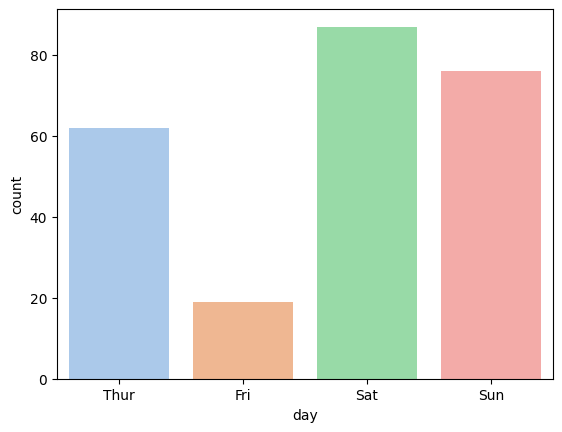

In [26]:
#countplot(x="변수", data=데이터프레임)
# --> day별로 데이터의 출현 빈도를 countplot 함수로 시각화하는 문장 작성
sns.countplot(x="day", data=tips)

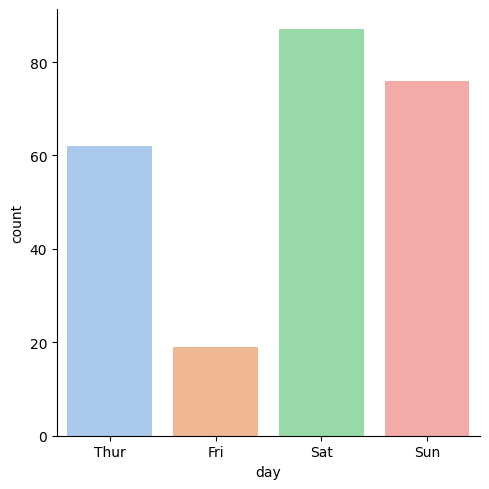

In [27]:
#sns.catplot('day', kind='count', data=데이터프레임)
# --> day별로 데이터의 출현 빈도를 catplot 함수로 시각화하는 문장 작성
sns.catplot(x="day", kind="count", data=tips)

#### 이변수

In [ ]:
#연속형/연속형

In [28]:
#jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
# --> total_bill과 tip 변수 간의 상관 관계를 jointplot 함수로 시각화하는 문장 작성

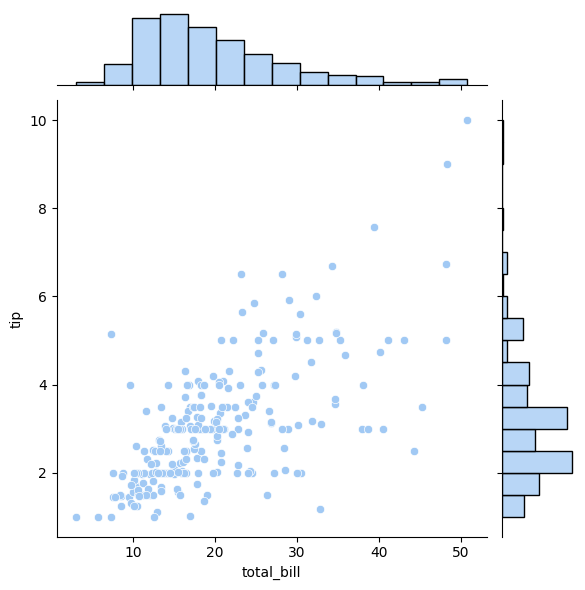

In [30]:
#커널밀도함수
# --> total_bill과 tip 변수 간의 상관 관계의 분포(커널밀도)를 jointplot 함수로 시각화하는 문장 작성
sns.jointplot(x="total_bill", y="tip", data=tips, kind='scatter')

In [ ]:
#범주형/범주형

<Axes: xlabel='sex', ylabel='smoker'>

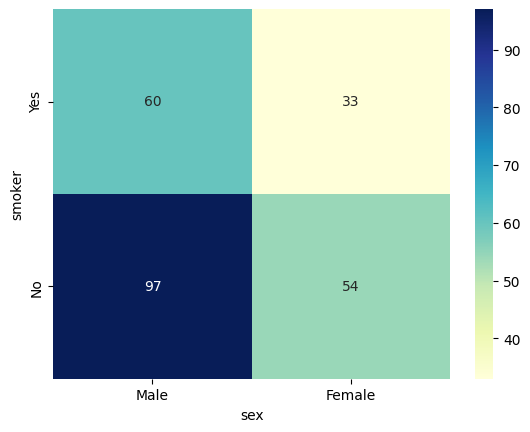

In [31]:
tips_var= tips.pivot_table(index="smoker", columns="sex", aggfunc="size")
tips_var
# --> smoker와 sex 변수 간의 상관관계를 담은 tips_var 데이터 프레임을 히트맵으로 시각화하는 문장 작성
sns.heatmap(tips_var, annot=True, cmap="YlGnBu", fmt='d')


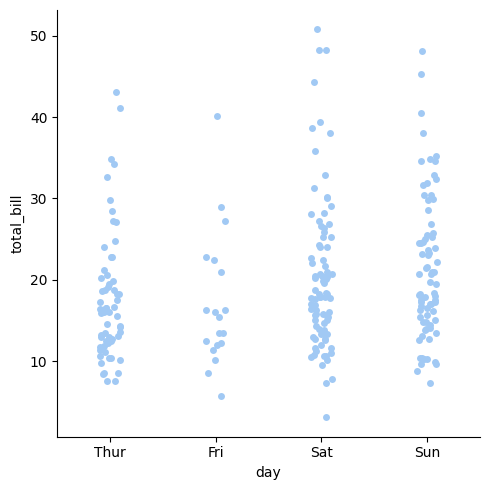

In [32]:
#범주형/연속형
# --> day와 total_bill 변수 간의 상관관계를 catplot 함수로 시각화하는 문장 작성
sns.catplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

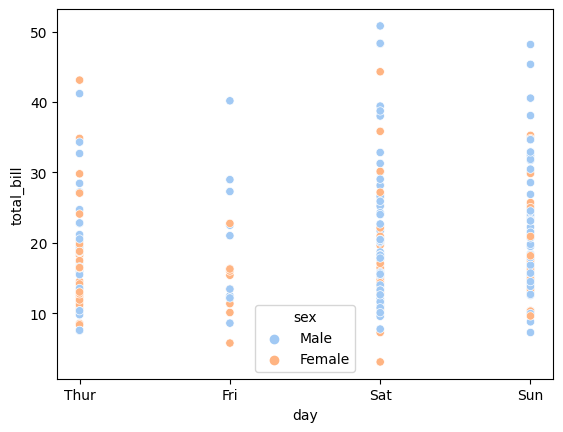

In [33]:
# --> day와 total_bill 변수 간의 상관관계를 sex별로 나눠서 시각화하는 문장 작성
sns.scatterplot(x="day", y="total_bill", data=tips, hue="sex")

<Axes: xlabel='day', ylabel='total_bill'>

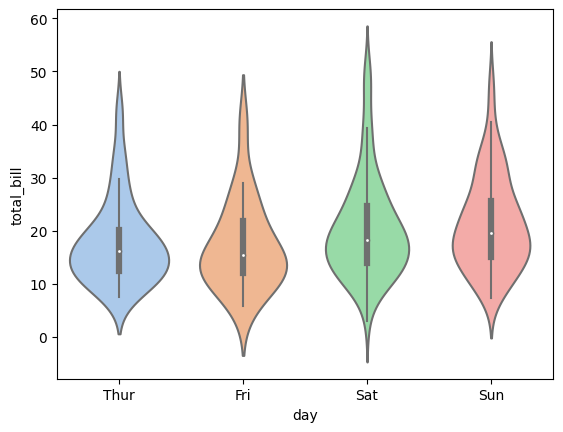

In [34]:
# --> day와 total_bill 변수 간의 상관관계를 violinplot으로 시각화하는 문장 작성
sns.violinplot(x="day", y="total_bill", data=tips)


<Axes: xlabel='day', ylabel='total_bill'>

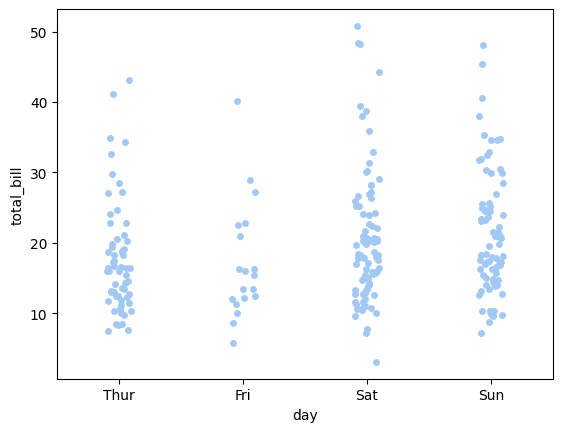

In [35]:
# --> day와 total_bill 변수 간의 상관관계를 stripplot 함수로 시각화하는 문장 작성
sns.stripplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

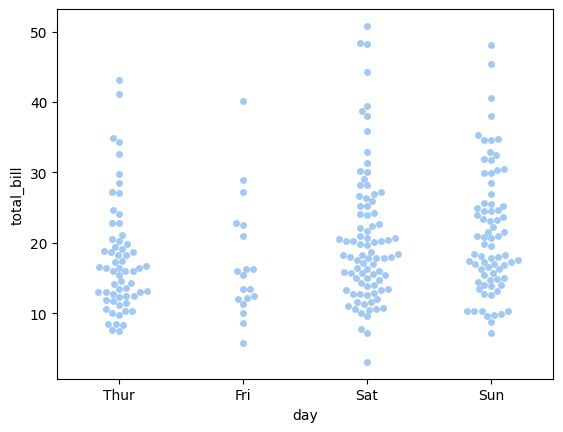

In [36]:
# --> day와 total_bill 변수 간의 상관관계를 swarmplot 함수를 사용하여 점그래프로 시각화하는 문장 작성
sns.swarmplot(x="day", y="total_bill", data=tips)


#### 다변량

#### 다변량 연속형

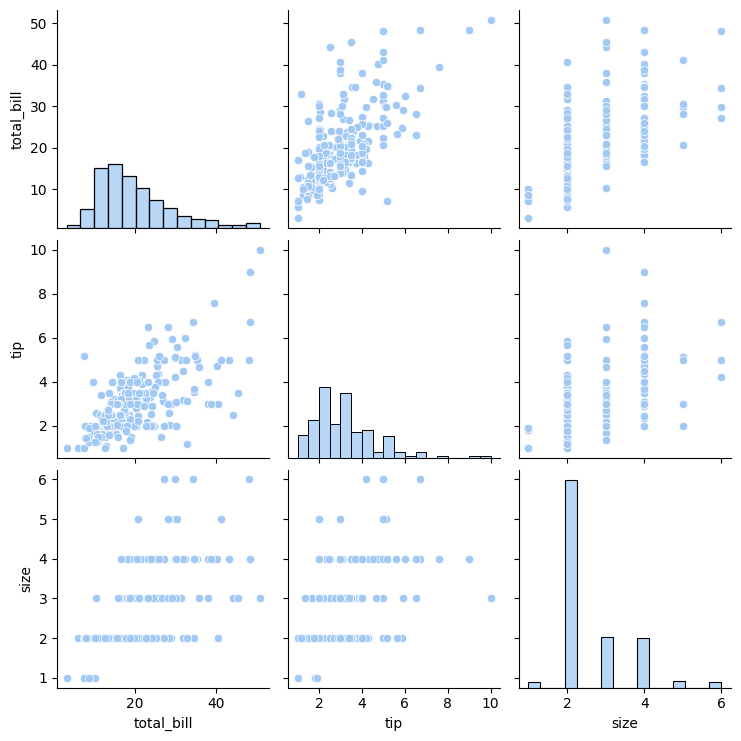

In [37]:
# --> tips 데이터 프레임내의 연속형 변수들간에 상관 관계를 pairplot 함수로 시각화하는 문장 작성
sns.pairplot(tips)

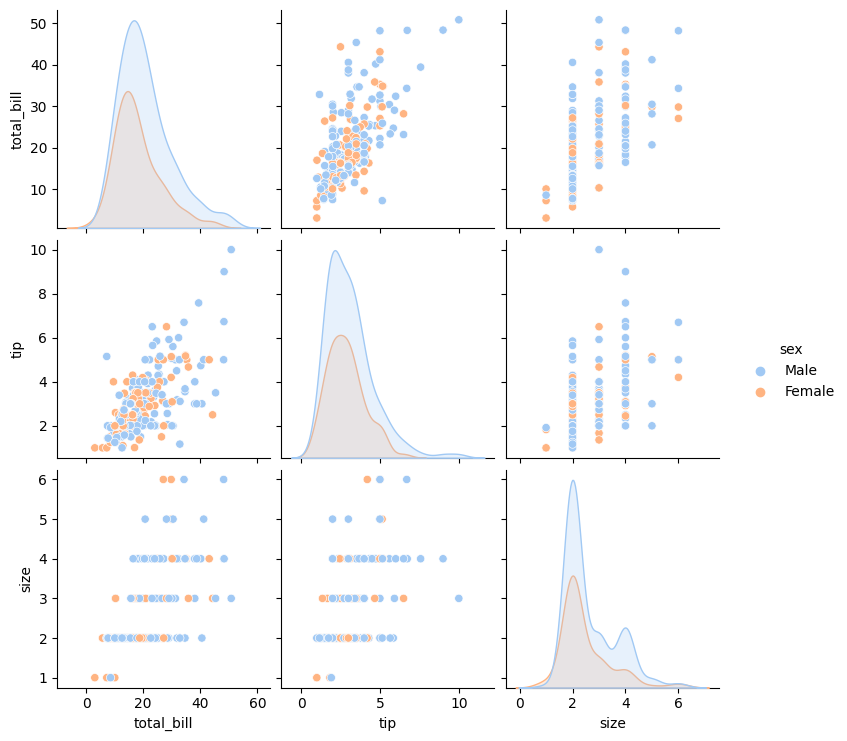

In [38]:
# --> tips 데이터 프레임내의 연속형 변수들간에 상관 관계를 sex별로 구분하여 pairplot 함수로 시각화하는 문장 작성sns.swarmplot
sns.pairplot(tips, hue="sex")

#### 다변량 범주형

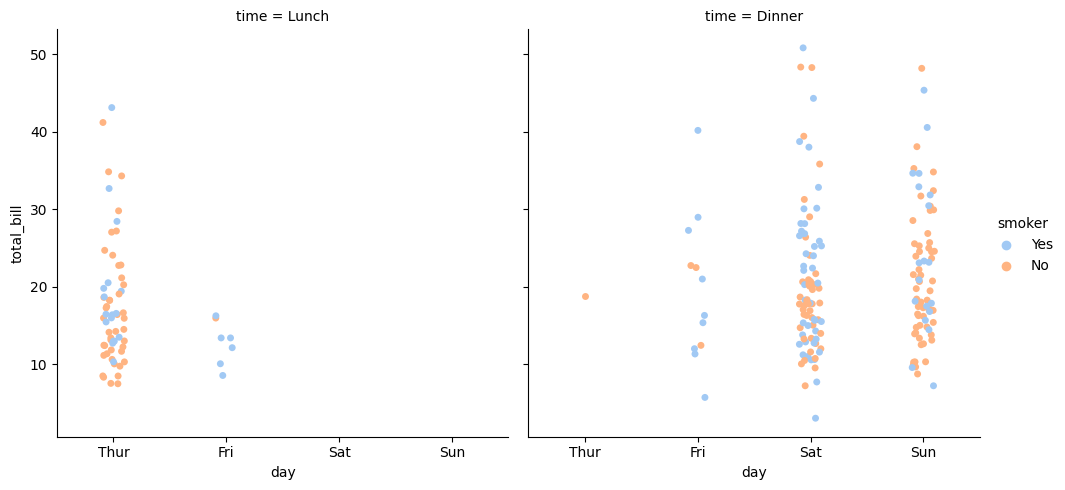

In [39]:
# catplot
# --> day와 total_bill 변수간의 상관 관계를 흡연/비흡연으로 구분하여 time별로 시각화하는 문장 작성
sns.catplot(x="day", y="total_bill", hue="smoker", col="time", data=tips, kind="strip")


<Axes: xlabel='day', ylabel='total_bill'>

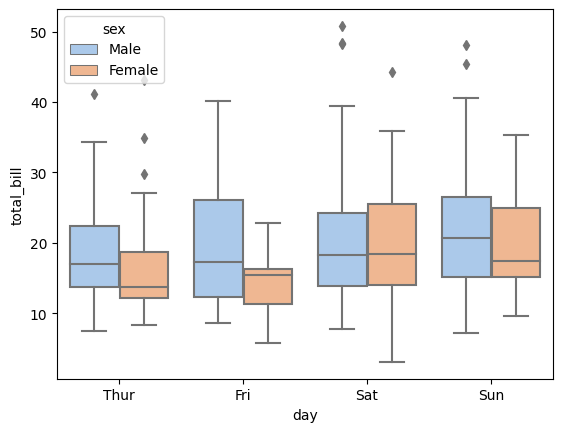

In [41]:
# boxplot
# --> day별 total_bill 데이터를 sex별로 구분하여 박스플롯으로 시각화하는 문장 작성
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex")

<Axes: xlabel='day', ylabel='total_bill'>

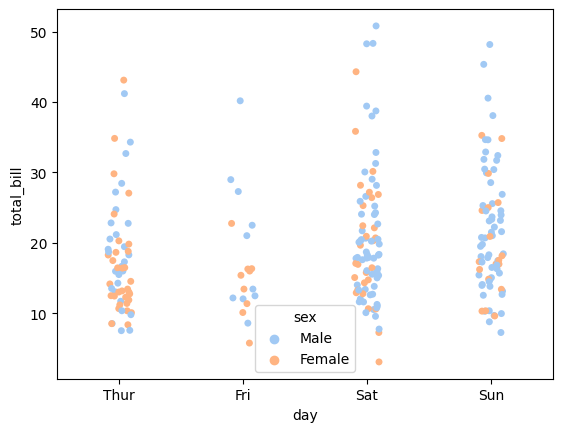

In [42]:
# stripplot
# --> day별 total_bill 데이터를 sex별로 구분하여 stripplot으로 시각화하는 문장 작성
sns.stripplot(x="day", y="total_bill", data=tips, hue="sex", jitter=True)

<Axes: xlabel='day', ylabel='total_bill'>

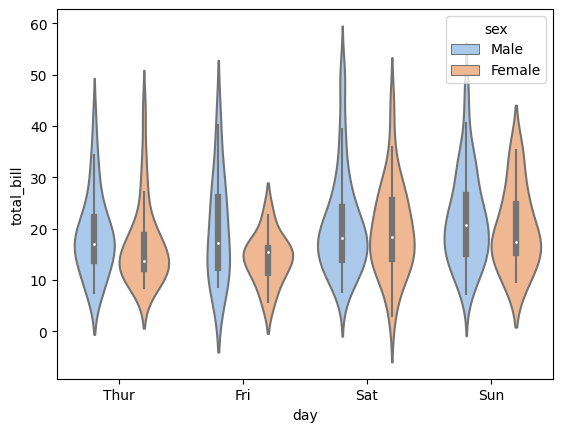

In [43]:
# violinplot
# --> day별 total_bill 데이터를 sex별로 구분하여 violinplot으로 시각화하는 문장 작성
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex")

#### 다차원그래프

<Axes: xlabel='day', ylabel='tip'>

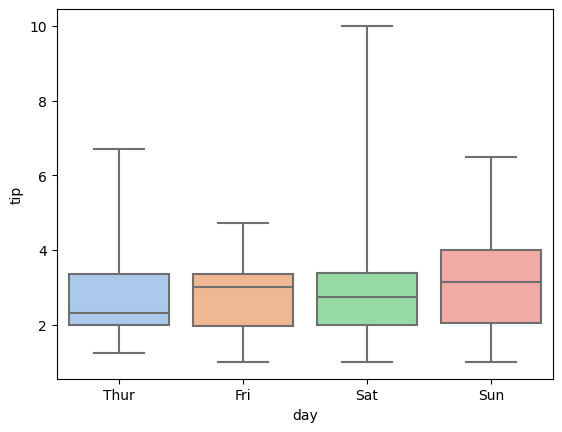

In [46]:
import numpy as np
# --> tip을 날짜별로 박스플롯으로 (수염의 길이(whis)는 1.5*IQR 대신에 무한대(np.inf)로 함) 시각화하는 문장 작성
sns.boxplot(x="day", y="tip", data=tips, whis=np.inf)

<Axes: xlabel='day', ylabel='tip'>

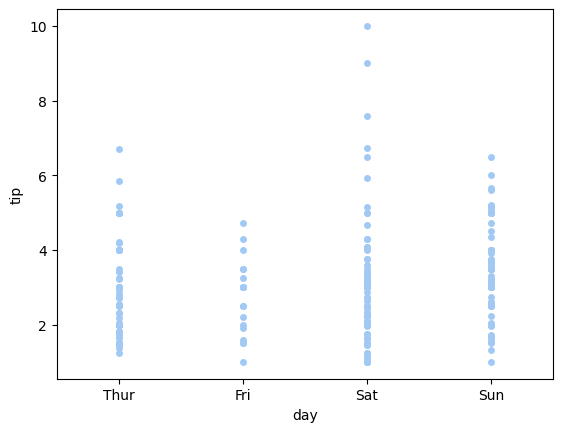

In [47]:
# --> tip을 day별로 점그래프(stripplot)로 (점들이 점쳐서 표시되지 않도록 (즉, jitter=True)) 시각화하는 문장 작성
sns.stripplot(x="day", y="tip", data=tips, jitter=False)

<Axes: xlabel='day', ylabel='total_bill'>

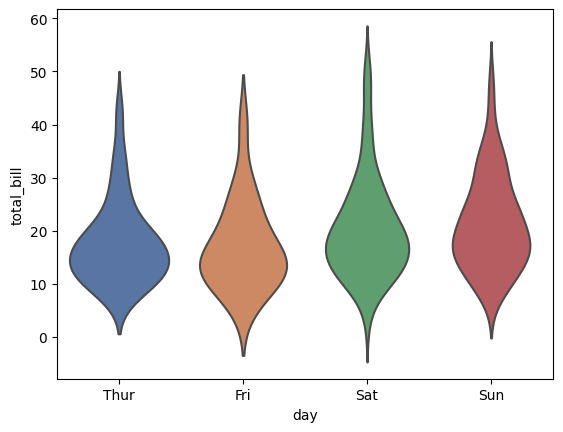

In [ ]:
# violinplot과 swarmplot의 다차원그래프
# --> day별로 total_bill을 violin그래프로 (가운데 표시되는 정보는 삭제하고 (즉, inner=None)) 시각화하는 문장 작성

<Axes: xlabel='day', ylabel='total_bill'>

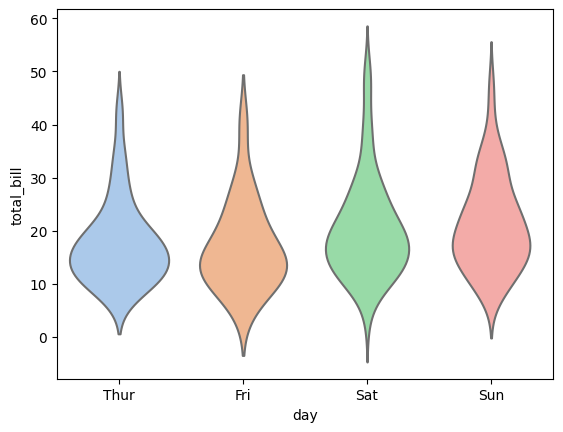

In [48]:
# --> day별로 total_bill을 점이 겹치지 않도록 점그래프(swarmplot)로 (색상을 적절히 지정하여 (예: color=0.9)) 시각화하는 문장 작성
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)

##실습과제 문제

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_eco = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/economics.csv", parse_dates = ['date'])
df_car = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv")

print(df_eco)
print(df_car)

          date      pce     pop  psavert  uempmed  unemploy
0   1967-07-01    507.4  198712     12.5      4.5      2944
1   1967-08-01    510.5  198911     12.5      4.7      2945
2   1967-09-01    516.3  199113     11.7      4.6      2958
3   1967-10-01    512.9  199311     12.5      4.9      3143
4   1967-11-01    518.1  199498     12.5      4.7      3066
..         ...      ...     ...      ...      ...       ...
569 2014-12-01  12122.0  320201      5.0     12.6      8688
570 2015-01-01  12080.8  320367      5.5     13.4      8979
571 2015-02-01  12095.9  320534      5.7     13.1      8705
572 2015-03-01  12161.5  320707      5.2     12.2      8575
573 2015-04-01  12158.9  320887      5.6     11.7      8549

[574 rows x 6 columns]
   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9   15.9       18.8        25   
1         Acura   Legend  Midsize       29.2   33.9       38.7        18   
2          Audi       90  Co

## **1. Seaborn 기본적인 활용**

---

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Seaborn의 플롯 함수는 계층적으로 보았을 때 Figure-level과 Axes-level 두 가지로 나뉘어집니다. 위 그림에서, `sns.relplot()`(상관분석), `sns.displot`(빈도/분포분석), `sns.catplot()`(범주형 분석)이 Figure-level function으로, 이들은 Figure 단위로 플롯을 생성합니다. 각 Figure-level function 밑에 적힌 function들은 Axes-level function으로, axes 단위로 플롯을 생성합니다. Axes-level function들은 각 함수가 하나의 구체적인 그래프 타입을 생성하며, Figure-level function들은 이러한 구체적인 그래프 타입을 `kind=str` 파라미터에 지정하여 생성할 수 있습니다.

---

[Seaborn - Introduction](https://seaborn.pydata.org/tutorial/introduction.html) <br>
[Seaborn - Functions](https://seaborn.pydata.org/tutorial/function_overview.html) <br>
[`sns.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html) <br>
[`sns.lineplot()`](https://seaborn.pydata.org/generated/seaborn.lineplot.html) <br>
[`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

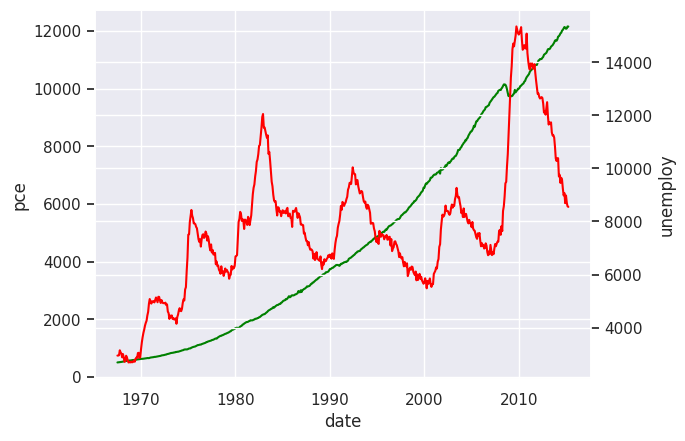

In [50]:
# 이용 예시 1 - Axes-level function을 이용해 하나의 Figure에 두 개의 서로 다른 그래프를 명시적으로 그림
sns.set_theme() # Seaborn 테마를 활성화합니다.

sns.lineplot(df_eco, x = 'date', y = 'pce', color = 'green') # 녹색의 선 그래프를 그립니다. Axes가 생성됩니다.
ax2 = plt.twinx() # x축을 공유하는 새로운 Axes를 생성합니다.
sns.lineplot(df_eco, x = 'date', y = 'unemploy', color = 'red', ax = ax2) # 적색의 선 그래프를 그립니다. 그려진 그래프를 위에 생성된 Axes에 지정합니다.

plt.show() # matplotlib의 show()함수를 이용해 seaborn의 그래프를 나타낼 수 있습니다.

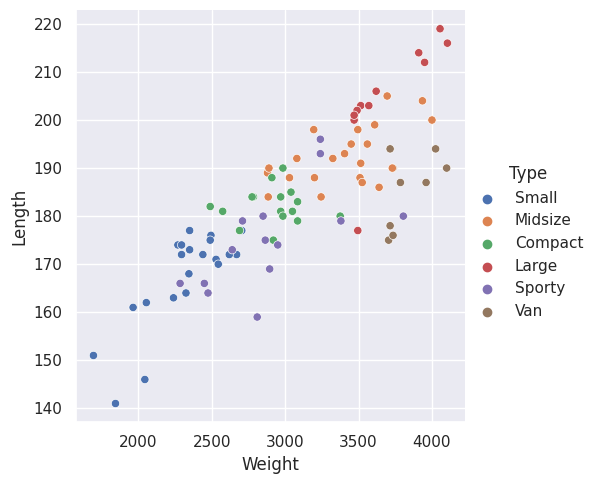

In [52]:
# 1. sns.relplot()와 df_car를 이용하여 x축에 'Weight'를 두고, y축에 'Length'를 둔,
# 'Type'별로 색상을 달리한(구체적인 색상은 무관합니다, 다르기만 하면 됩니다) scatter plot을 생성하세요.
sns.relplot(x='Weight', y='Length', hue='Type', data=df_car)


###### 아래는 수정하지 마세요.

plt.show()

## **2. `matplotlib.pyplot`으로 생성한 그래프와 Seaborn으로 생성한 그래프를 동시에 나타내기**

---

일반적으로, Seaborn에서 생성한 Axes 혹은 Figure는 `matplotlib.pyplot`의 것과 동일하게 취급할 수 있습니다. 예를 들어, `plt.subplots()`로 생성한 각각의 axes에 `plt.plot()`과 같은 `matplotlib.pyplot`의 플롯 함수를 이용할 수도 있고, `sns.lineplot()`과 같은 Seaborn의 Axes-level function의 `ax` 파라미터에 지정하고자 하는 Axes를 넘겨주어 이용할 수도 있습니다.

---
[matplotlib axes arrangement](https://matplotlib.org/stable/users/explain/axes/arranging_axes.html) <br>
[Axes assignment example](https://seaborn.pydata.org/tutorial/function_overview.html#axes-level-functions-make-self-contained-plots)

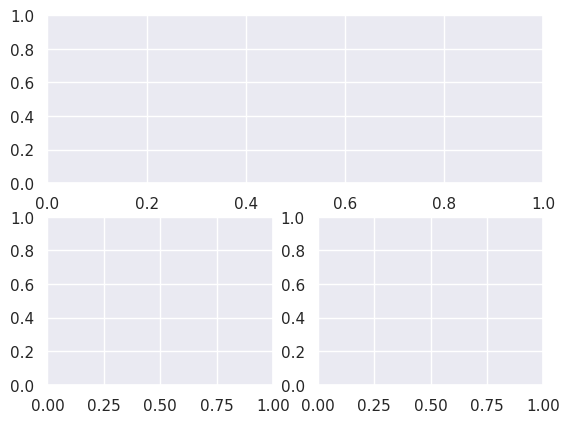

In [53]:
fig = plt.figure()
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
ax10 = fig.add_subplot(spec[1, 0])
ax11 = fig.add_subplot(spec[1, 1])

plt.show()

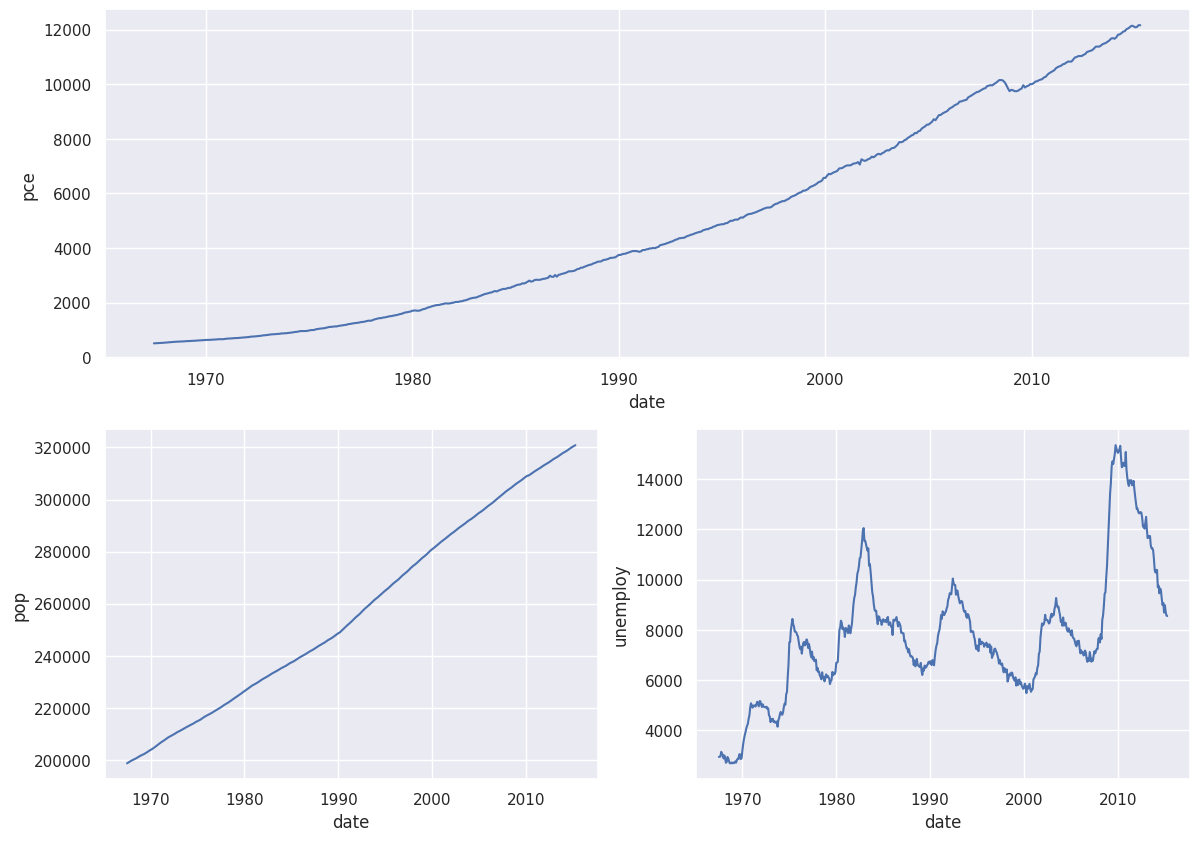

In [55]:
# 2. 아래에는 위와 같이 세 개의 Axes를 가진 Figure가 주어져 있습니다.
# matplotlib으로 좌측 하단의 Axes에 x = 'date', y = 'pce'인 선 그래프를 그리고,
# seaborn으로 우측 하단의 Axes에 x = 'date', y = 'pop'인 선 그래프를 그리고,
# seaborn으로 상단의 Axes에 x = 'date', y = 'unemploy'인 선 그래프를 그리세요.
# 대상 데이터셋은 df_eco입니다.

fig = plt.figure(figsize = (14, 10))
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
ax10 = fig.add_subplot(spec[1, 0])
ax11 = fig.add_subplot(spec[1, 1])

###### 위는 수정하지 마세요.

ax0.plot(df_eco['date'], df_eco['pce'])
ax0.set_xlabel('date')
ax0.set_ylabel('pce')

# 우측 하단의 Axes에 선 그래프 그리기 (seaborn 사용)
sns.lineplot(x='date', y='pop', data=df_eco, ax=ax10)
ax10.set_xlabel('date')
ax10.set_ylabel('pop')

# 상단의 Axes에 선 그래프 그리기 (seaborn 사용)
sns.lineplot(x='date', y='unemploy', data=df_eco, ax=ax11)
ax11.set_xlabel('date')
ax11.set_ylabel('unemploy')

###### 아래는 수정하지 마세요.

plt.show()